First 5 rows of dataset:
    Feature1  Feature2
0  -9.113944  6.813616
1  -9.354576  7.092790
2  -2.015671  8.281780
3  -7.010236 -6.220843
4 -10.061202  6.718671


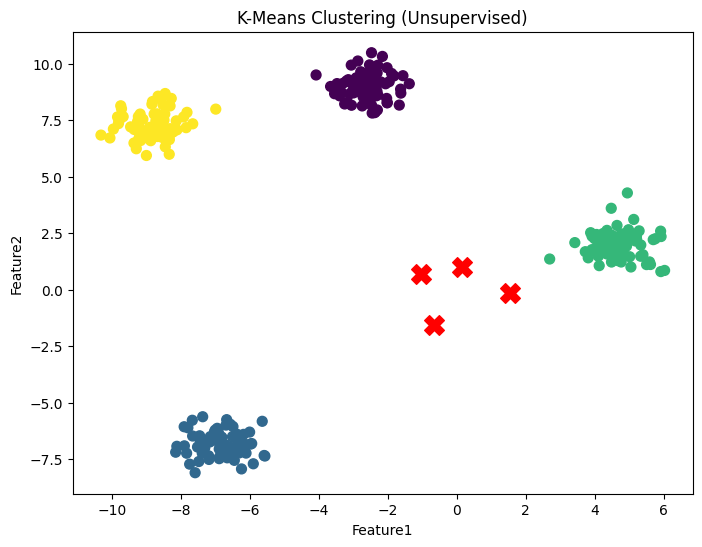

Silhouette Score: 0.88


In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("make_blobs_dataset.csv")
print("First 5 rows of dataset:")
print(df.head())

X = df[['Feature1', 'Feature2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

df['Cluster'] = labels

plt.figure(figsize=(8,6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(centers[:, 0]*X_scaled.std()+X_scaled.mean(), 
            centers[:, 1]*X_scaled.std()+X_scaled.mean(), 
            c='red', s=200, marker='X')  # cluster centers
plt.title('K-Means Clustering (Unsupervised)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")


